In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("polynomial50.csv")

In [3]:
df.head()

,x,f,y
0,0.000000,1.000000,0.923951
1,0.020408,1.039176,1.028283
2,0.040816,1.075173,1.069739
3,0.061224,1.108144,1.077327
4,0.081633,1.138242,1.105688


Visualizing the data

In [4]:
from sklearn.preprocessing import normalize

x = normalize(df[["x"]].values, norm="l1", axis=0)

# # print(x.sum())
# x = df[["x"]].values

# x = (x-np.mean(x)) / np.std(x)
# # print(x.sum())


y = df["y"].values
f = df["f"].values

Text(0, 0.5, 'Predictor - $Y$')

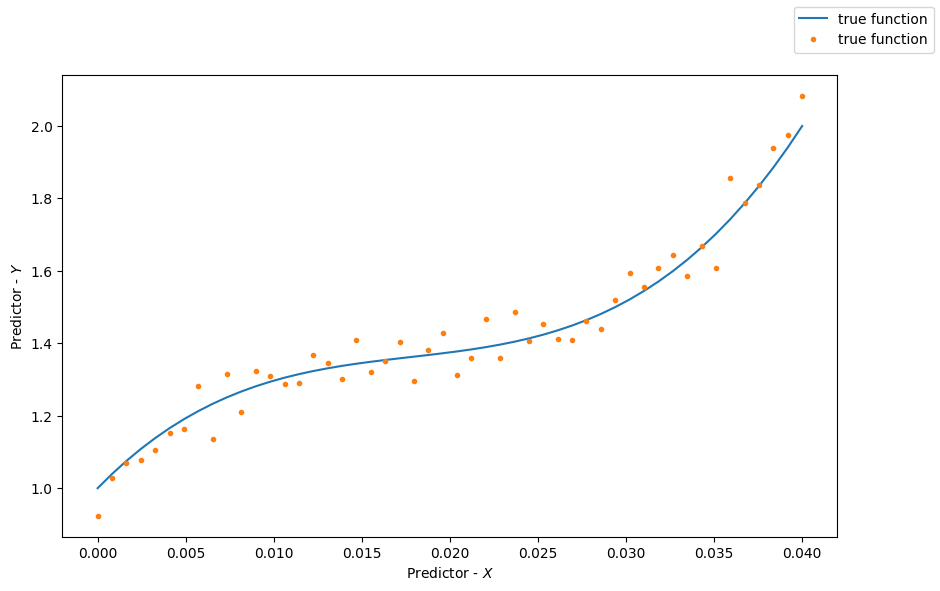

In [5]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x,f, "-", label = "true function")
ax.plot(x,y, ".", label = "true function")

fig.legend()
ax.set_xlabel("Predictor - $X$")
ax.set_ylabel("Predictor - $Y$")

Step 1: Split data into train and validation split

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x,y, train_size=0.8)

In [7]:
# Set degree of polynomial
degree = 3

# Set range of tuning parameters
alphas = np.logspace(start=10, stop=-50, num=20, base=10)

training_error, validation_error = [],[]

# store models for later plotting
estimator = []


# Iterate through each alpha, and calculate the training and validation errors for each
for alpha in alphas:

    x_poly_train = PolynomialFeatures(degree=degree).fit_transform(x_train)
    x_poly_val = PolynomialFeatures(degree=degree).fit_transform(x_val)

    ridge_reg = Ridge(fit_intercept=False, alpha=alpha)
    ridge_reg.fit(x_poly_train, y_train)

    y_train_pred = ridge_reg.predict(x_poly_train)
    y_val_pred = ridge_reg.predict(x_poly_val)

    training_mse = mean_squared_error(y_train, y_train_pred)
    validation_mse = mean_squared_error(y_val, y_val_pred)

    training_error.append(training_mse)
    validation_error.append(validation_mse)
    estimator.append(ridge_reg)


    # plot the results
    # plot the regression 




In [8]:
best_index = training_error.index(min(training_error))
best_estimator = estimator[best_index]

In [9]:
estimator_coef_list = []

for est in estimator:
    estimator_coef_list.append(est.coef_)

estimator_coef_df  = pd.DataFrame(estimator_coef_list)

estimator_coef_df

,0,1,2,3
0,5.805612e-09,1.335341e-10,3.838712e-12,1.221142e-13
1,8.351034e-06,1.920811e-07,5.521767e-09,1.756542e-10
2,1.191396e-02,2.742044e-04,7.885317e-06,2.508996e-07
3,1.337787e+00,5.867160e-02,2.130492e-03,7.713708e-05
4,1.166007e+00,1.341211e+01,6.672909e-01,2.872220e-02
5,1.073721e+00,1.483380e+01,1.070445e+02,8.532700e+00
6,1.161419e+00,4.433862e+00,2.562176e+02,2.588231e+03
7,9.495884e-01,5.926591e+01,-2.976943e+03,5.446467e+04
8,9.464111e-01,6.008786e+01,-3.025391e+03,5.524182e+04
9,9.464089e-01,6.008844e+01,-3.025425e+03,5.524237e+04


Text(0, 0.5, 'coefficient')

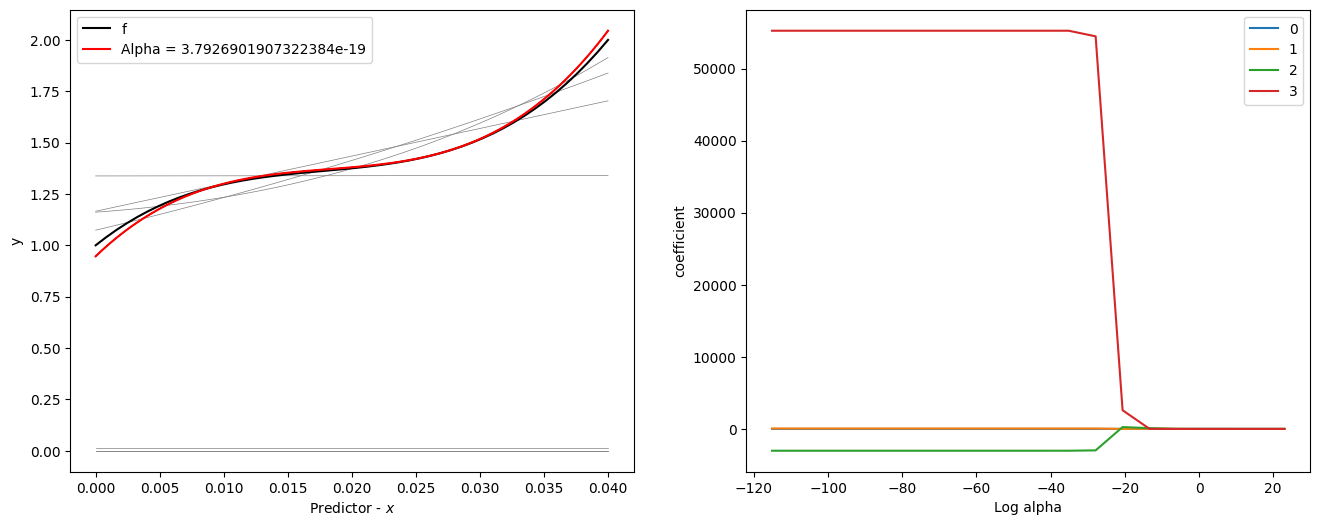

In [10]:
fig, row = plt.subplots(1, 2, figsize=(16,6))

left, right = row

transx = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
transX = PolynomialFeatures(degree).fit_transform(transx)

for i, alpha in enumerate(alphas):

    left.plot(transx, estimator[i].predict(transX), color = "grey", linewidth=0.5)


# plot the true line
left.plot(x,f, "black",label="f")
left.plot(transx, best_estimator.predict(transX), color="red", label = f"Alpha = {alphas[best_index]}")
left.set_xlabel("Predictor - $x$")
left.set_ylabel("y")
left.legend()


# plot how each coefficient changes as alpha increases

right.plot(np.log(alphas),estimator_coef_df)
right.legend(estimator_coef_df.columns)
right.set_xlabel("Log alpha")
right.set_ylabel("coefficient")